One of the advantages of Keras is that it can import this dataset for you without needing to explicitly download it from the web (it will download it for you). We'll normalize the images and we'll convert the target data to one-hot encoding: 

In [1]:
import tensorflow as tf

(X_train, Y_train), (X_validation, Y_validation) = \
    tf.keras.datasets.mnist.load_data()

X_train = X_train.reshape(60000, 784) / 255
X_validation = X_validation.reshape(10000, 784) / 255

classes = 10
Y_train = tf.keras.utils.to_categorical(Y_train, classes)
Y_validation = tf.keras.utils.to_categorical(Y_validation, classes)

11490434/11490434 [==============================] - 0s 0us/step


Next, we'll define the network:

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation

input_size = 784
hidden_units = 100

model = Sequential([
    Dense(
        hidden_units, input_dim=input_size),
    BatchNormalization(),
    Activation('relu'),
    Dense(classes),
    Activation('softmax')
])

Then, we'll run the training for 20 epochs:

In [3]:
model.compile(
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    optimizer='adam')

model.fit(X_train, Y_train,
          batch_size=100, epochs=20,
          verbose=1)

Epoch 1/20
600/600 [==============================] - 10s 13ms/step - loss: 0.3052 - accuracy: 0.9155
Epoch 2/20
600/600 [==============================] - 4s 7ms/step - loss: 0.1401 - accuracy: 0.9611
Epoch 3/20
600/600 [==============================] - 3s 4ms/step - loss: 0.1003 - accuracy: 0.9718
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0778 - accuracy: 0.9782
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0625 - accuracy: 0.9816
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0512 - accuracy: 0.9854
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0423 - accuracy: 0.9882
Epoch 8/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0359 - accuracy: 0.9901
Epoch 9/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0301 - accuracy: 0.9919
Epoch 10/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0257 - accuracy: 0.99

Finally, we'll evaluate the network:

In [4]:
score = model.evaluate(X_validation, Y_validation, verbose=1)
print('Validation accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0856 - accuracy: 0.9761
Validation accuracy: 0.9761000275611877


We'll visualize the weights of the hidden layer:

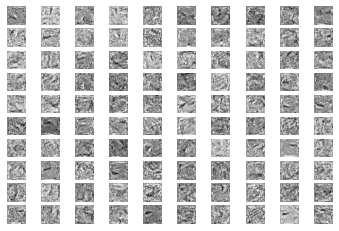

In [5]:
weights = model.layers[0].get_weights()

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy

fig = plt.figure()

w = weights[0].T
for unit in range(hidden_units):
    ax = fig.add_subplot(10, 10, unit + 1)
    ax.axis("off")
    ax.imshow(numpy.reshape(w[unit], (28, 28)), cmap=cm.Greys_r)

plt.show()